# T-Test examples

This workbook works through some examples of Paired Sample T-Test

***Amazing*** reference at:

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

and to be clear - the examples below are taken directly from that site.

### Student’s t-test
Tests whether the means of two independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.


In [2]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


### Paired Student’s t-test
Tests whether the means of two **paired** samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are **paired**.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [3]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


### Analysis of Variance Test (ANOVA)
Tests whether the means of **two or more** independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

In [4]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


In [ ]:
#--------------------------------------

In [1]:
import pandas as pd
dfx = pd.read_csv('dataset\\Data-sets\\blood_pressure.csv')
df = dfx.sample(n=3, frac=None, replace=False, weights=None, random_state=None, axis=None)
df

,patient,sex,agegrp,bp_before,bp_after
104,105,Female,60+,162,138
85,86,Female,46-59,154,146
55,56,Male,60+,164,146


# Source 1
Best description:  https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests

and: https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions


A common analogy is that the t-value is the signal-to-noise ratio.

For the 1-sample T-Test:

$$t = \frac
{\bar{x} - \mu}
{\frac{s}{\sqrt{n}}}
$$

The numerator is signal.  This is difference between sample mean and null hypothesis.  For a 1-sample T-Test the sample mean is the mean of the set of samples.  For a 2-Sample T-Test the "sample mean" is the mean of the **differences** between the sets of samples.

Denominator is noise.  This is the standard error of the mean.  Standard error of the mean is standard deviation of the samples ("s") divided by square root of the number of samples.  Technically it is the standard deviation of the *population* divided... but we don't typically have access t the population.

Both are in the units of the experiment.

**Paired t-Test is just a 1-Sample t-Test...**

T-value considers:
* "n" (number of samples).  As N increases the T-value increases.  This makes sense as a larger 
* strength of signal - this is the numerator
* variability in data - as variability increases the noise (denominator) increases, thus reducing the T-value




In [48]:
import pandas as pd

dfx = pd.read_csv('dataset\\Data-sets\\blood_pressure.csv')
df = dfx
df['bp_difference'] = df['bp_before'] - df['bp_after']
#df.describe()

In [45]:
print("-- count --")
print(df[['bp_difference']].count())
print("-- standard deviation --")
print(df[['bp_difference']].std())
print("-- standard error of the mean --")
print(df[['bp_difference']].sem())

-- count --
bp_difference    120
dtype: int64
-- standard deviation --
bp_difference    16.713601
dtype: float64
-- standard error of the mean --
bp_difference    1.525736
dtype: float64


In [46]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

### To see how we get from t-values to assessing hypotheses and determining statistical significance, read the other post in this series, 

Understanding t-Tests: t-values and t-distributions:
https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions

Each type of t-test uses a specific procedure to boil all of your sample data down to one value, the t-value. 

A t-value is a test statistic - this is a standardized value that is calculated from sample data during a hypothesis test. 
    
***The procedure that calculates the test statistic compares your data to what is expected under the null hypothesis.***

In other words...  the value of the t- statistic has compared the data to what is expected under the null hypothesis.

In other words - the T-value reflects the sample size, variability in the data, along with the signal strength.

***We need a larger context in which we can place individual t-values before we can interpret them. This is where t-distributions come in.***



# Source 2
As described at https://www.thoughtco.com/fail-to-reject-in-a-hypothesis-test-3126424

In statistics, scientists can perform a number of different significance tests to determine if there is a relationship between two phenomena. One of the first they usually perform is a null hypothesis test.

After a performing a test, scientists can:

* Reject the null hypothesis or
* Fail to reject the null hypothes

For example If you are performing a drug test and want to demonstrate a relationship between the drug and its effect, your null hypothesis would be that the drug has no effect.  You would get results showing either

Reject the null hypothesis - disproved that the drug had no effect - i.e. the drug DID have an effect)
Fail to reject the null hypothesis - the evidence did not disprove the drug had no effect.  Note this does not say the drug did not have an effect.  There is no conclusion in this case.





In [31]:
import pandas as pd

dfx = pd.read_csv('dataset\\Data-sets\\blood_pressure.csv')

dfx

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


## Example 1
from http://pythonfordatascience.org/paired-samples-t-test-python/

From the site:

The paired sample t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

The hypothesis being test is:

Null hypothesis (H0): ud = 0, which translates to the mean difference between sample 1 and sample 2 is equal to 0.
Alternative hypothesis (HA): ud ? 0, which translates to the mean difference between sample 1 and sample 2 is not equal to 0.

***If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.***

### Dataset

### Paired T for (before - after)...

In [22]:
df = dfx.sample(n=10, frac=None, replace=False, weights=None, random_state=None, axis=None)
df

,patient,sex,agegrp,bp_before,bp_after
41,42,Male,60+,158,158
101,102,Female,60+,142,141
7,8,Male,30-45,153,141
27,28,Male,46-59,142,183
23,24,Male,46-59,159,132
62,63,Female,30-45,144,146
104,105,Female,60+,162,138
19,20,Male,30-45,162,150
58,59,Male,60+,172,161
21,22,Male,46-59,156,155


### Checking for outliers

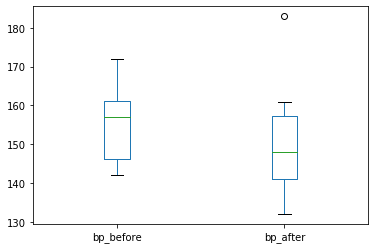

In [25]:
from scipy import stats
import matplotlib.pyplot as plt

df[['bp_before', 'bp_after']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')

### Assumption Check: Normal Distribution

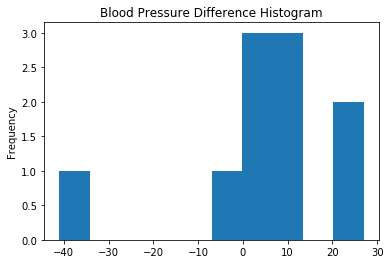

In [26]:
df['bp_difference'] = df['bp_before'] - df['bp_after']

df['bp_difference'].plot(kind='hist', title= 'Blood Pressure Difference Histogram')
#Again, this saves the plot as a png file
plt.savefig('blood pressure difference histogram.png')

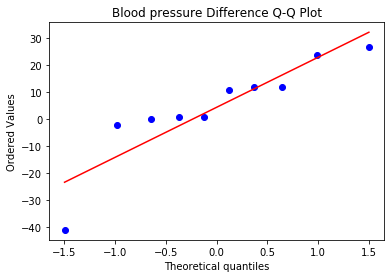

In [27]:
stats.probplot(df['bp_difference'], plot= plt)
plt.title('Blood pressure Difference Q-Q Plot')
plt.savefig('blood pressure difference qq plot.png')

### Shapiro-Wilk test for Normality

In [28]:
stats.shapiro(df['bp_difference'])

(0.8418102264404297, 0.04638257995247841)

### Paired Samples T-Test Example

In [29]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

Ttest_relResult(statistic=0.75484988108449, pvalue=0.4696301011199092)

#### When using the entire dataset...

The findings are statistically significant! One can reject the null hypothesis in support of the alternative.

Another component needed to report the findings is the degrees of freedom (df). This can be calculated by taking the total number of paired observations and subtracting 1. In our case, df = 120 – 1 = 119.

the null hypothesis is before and after are the same (difference between means is statistically insignificant)
If p < 0.05 then reject the null

In this case:
    p IS less than 0.05
    so we reject the null
    and the conclusion is they are statistically different
    
    

#### When using 10 samples from the dataset...

p = 0.4696
p is greater than 0.05 so we accept the null and the  conclusion is they are statistically the same